In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Бинарная классификация с SGD
def model(w, x):
    return np.dot(w, x)

def loss(w, x, y):
    M = model(w, x) * y
    return 2 / (1 + np.exp(M))

def dL(w, x, y):
    M = model(w, x) * y
    return  -2 * np.exp(M) * x * y / (1 + np.exp(M)) ** 2

In [9]:
data_x = [(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)]
data_y = [-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1]
w = np.zeros(3)
x_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)
n_train = len(x_train)
batch_size = 10
N = 500
lm = 0.01
nt = np.array([1, 0.1, 0.1])
# print(dL(w, x_train[0], y_train[0]))
Qe = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])
np.random.seed(0)

In [10]:
for _ in range(N):
    k = np.random.randint(0, n_train - batch_size - 1)
    xt, yt = x_train[k:k+batch_size], y_train[k:k+batch_size]
    
    # w -= nt * sum([dL(w, x, y) for x, y in zip(xt, yt)])/ batch_size
    ek = [loss(w, x, y) for x, y in zip(xt, yt)]
    Qe = lm * np.mean(ek) + (1 - lm) * Qe
    w -= nt * np.mean([dL(w, x, y) for x, y in zip(xt, yt)], axis=0)
    
Q = sum([model(w, x) * y < 0 for x,y in zip(x_train, y_train)])
print(w, Qe, Q, sep='\n')

[-7.19963529  0.04245181  4.06445484]
0.5406024504857128
6


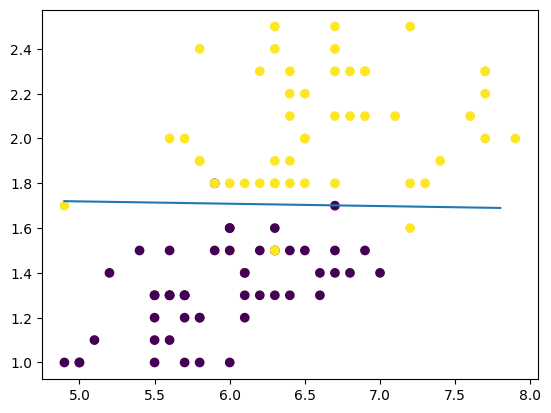

In [11]:
plt.scatter(x_train[:, 1], x_train[:, 2], c=y_train)
xxx = np.arange(min(x_train[:, 1]), max(x_train[:, 1]), 0.1)
plt.plot(xxx, [-x * w[1] / w[2] - w[0] / w[2] for x in xxx])

In [6]:
# import numpy as np
# import matplotlib.pyplot as plt


# # сигмоидная функция потерь
# def loss(w, x, y):
#     M = np.dot(w, x) * y
#     return 2 / (1 + np.exp(M))


# # производная сигмоидной функции потерь по вектору w
# def df(w, x, y):
#     M = np.dot(w, x) * y
#     return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y


# # обучающая выборка с тремя признаками (третий - константа +1)
# x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
# x_train = [[1] + x for x in x_train]
# x_train = np.array(x_train)
# y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

# n_train = len(x_train)  # размер обучающей выборки
# w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
# nt = 0.0005  # шаг сходимости SGD
# lm = 0.01  # скорость "забывания" для Q
# N = 500  # число итераций SGD

# Q = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])  # показатель качества
# Q_plot = [Q]

# for i in range(N):
#     k = np.random.randint(0, n_train - 1)  # случайный индекс
#     ek = loss(w, x_train[k], y_train[k])  # вычисление потерь для выбранного вектора
#     w = w - nt * df(w, x_train[k], y_train[k])  # корректировка весов по SGD
#     Q = lm * ek + (1 - lm) * Q  # пересчет показателя качества
#     Q_plot.append(Q)

# # print(w)
# # print(Q_plot)

# line_x = list(range(max(x_train[:, 1])))  # формирование графика разделяющей линии
# line_y = [-x * w[1] / w[2] - w[0] / w[2] for x in line_x]

# x_0 = x_train[y_train == 1]  # формирование точек для 1-го
# x_1 = x_train[y_train == -1]  # и 2-го классов

# plt.scatter(x_0[:, 1], x_0[:, 2], color='red')
# plt.scatter(x_1[:, 1], x_1[:, 2], color='blue')
# plt.plot(line_x, line_y, color='green')

# plt.xlim([0, 45])
# plt.ylim([0, 75])
# plt.ylabel("длина")
# plt.xlabel("ширина")
# plt.grid(True)
# plt.show()